<a href="https://colab.research.google.com/github/10sneha/ML_Practice/blob/main/Fertilizer_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Fertilizer Prediction.csv')
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [ ]:
df.shape

(99, 9)

In [ ]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [ ]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [ ]:
print(df['Soil Type'].unique())
print(df['Crop Type'].unique())
print(df['Fertilizer Name'].unique())

['Sandy' 'Loamy' 'Black' 'Red' 'Clayey']
['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts']
['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26']


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Soil Type']= label_encoder.fit_transform(df['Soil Type'])
df['Crop Type']= label_encoder.fit_transform(df['Crop Type'])
df['Fertilizer Name']= label_encoder.fit_transform(df['Fertilizer Name'])

In [ ]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


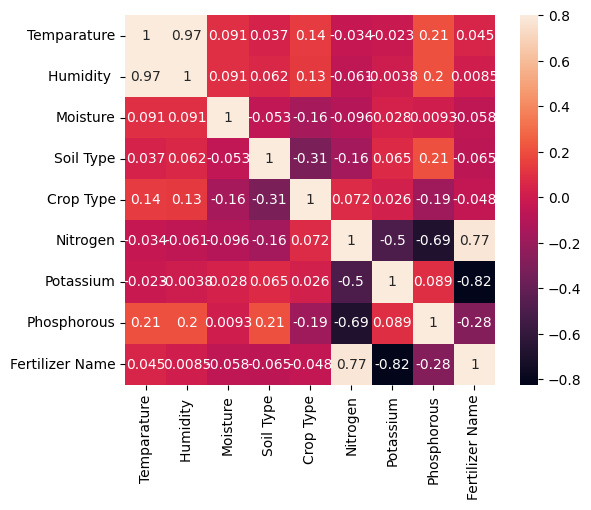

In [ ]:
sns.heatmap(df.corr(),square= True, vmax=0.8,annot=True)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pickle

In [ ]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(79, 8)
(79,)


In [ ]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [ ]:
regressor = LogisticRegression()
regressor.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         2

    accuracy                           0.85        20
   macro avg       0.76      0.76      0.76        20
weighted avg       0.83      0.85      0.84        20



In [ ]:
accuracy_score(y_test,y_pred)

0.85

# New Section

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred= classifier.predict(x_test)

In [ ]:
cr2 = classification_report(y_test, y_pred)
print(cr2)

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.60      0.75      0.67         4
           2       0.00      0.00      0.00         1
           3       0.50      0.50      0.50         2
           4       0.25      1.00      0.40         1
           5       0.75      0.43      0.55         7
           6       1.00      1.00      1.00         2

    accuracy                           0.55        20
   macro avg       0.51      0.57      0.50        20
weighted avg       0.62      0.55      0.55        20



In [ ]:
accuracy_score(y_test,y_pred)

0.55

In [ ]:
filename1 = 'finalized1_model.sav'
filename2 = 'finalized2_model.sav'
pickle.dump(regressor, open(filename1, 'wb'))
pickle.dump(classifier, open(filename2, 'wb'))

In [ ]:
loaded_model1 = pickle.load(open(filename1, 'rb'))
loaded_model2 = pickle.load(open(filename2, 'rb'))
result1 = loaded_model1.score(x_test, y_test)
result2 = loaded_model2.score(x_test, y_test)
print(result1)
print(result2)

0.85
0.55
